## Import scCASE and the dependencies.

In [1]:
import scCASE
import pandas as pd
import scanpy as sc
import anndata as ad

## Check data

Load the AnnData object of n_obs × n_vars count matrix (Or csv/txt format which rows correspond to cells and columns to genes). Dataset used in tutorial can be find found [here](https://zenodo.org/record/8382877).

In [2]:
adata = sc.read("BM0828.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 533 × 320083
    obs: 'cell_type'
    var: 'peak'

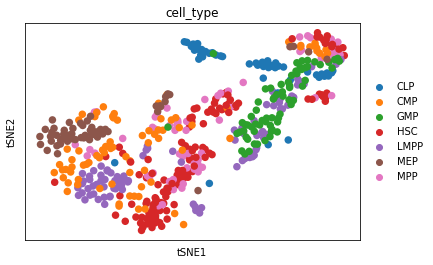

In [4]:
sc.pp.pca(adata)
sc.tl.tsne(adata)
sc.pl.tsne(adata,color = ["cell_type"])

## Run scCASE

Run scCASE with function scCASE.run

In [5]:
data_imputed = scCASE.run("BM0828.h5ad",data_format="h5ad",method= "scCASE",obs_key = "cell_type",var_key = "peak",save_other_matrixs_=True)
#OR scCASE.run("donor_BM0828.txt",data_format="csv",data_sep = "\t")

Data shape after feature selection:
(99662, 533)
Raw dataset shape:  (533, 99662)
Dataset shape after preprocessing:  (533, 92229)
Estimating by sum of squared distances...
Estimating by Davies-Bouldin score...
Estimating by silhouette coefficient...
Initializing...
Generating similarity matrix...
Updating...
Iteration: 1	Loss: 0.8781687867541762	norm1: 0.001313692587408959	norm2: 0.001480842917758929	norm3: 0.7016299619852681	norm4: 0.17374428926374028	norm5: 0.0
Iteration: 2	Loss: 0.8624734489958861	norm1: 0.0013050422530350074	norm2: 3.9561991178435656e-05	norm3: 0.6870207315447849	norm4: 0.1741081132068877	norm5: 0.0
Iteration: 3	Loss: 0.8703789095030077	norm1: 0.0012703970926020657	norm2: 3.956996585804331e-05	norm3: 0.6949579053156111	norm4: 0.17411103712893655	norm5: 0.0


## Running scCASE with seed 103 ##




In [6]:
adata_imputed = ad.AnnData(data_imputed[0].T)
adata_imputed.obs = pd.DataFrame(data_imputed[0].columns,columns = ["cell_type"])
adata_imputed.var = pd.DataFrame(data_imputed[0].index,columns = ["peak"])

In [7]:
adata_imputed

AnnData object with n_obs × n_vars = 533 × 99662
    obs: 'cell_type'
    var: 'peak'

## Analysis

### Visualization

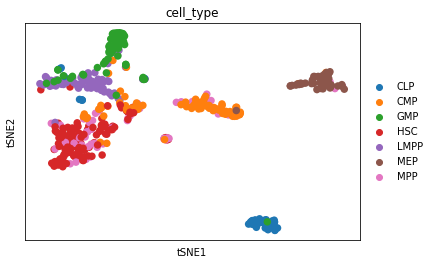

In [8]:
sc.pp.pca(adata_imputed)
sc.tl.tsne(adata_imputed)
sc.pl.tsne(adata_imputed,color = ["cell_type"])

### Identify specific peaks

In [9]:
Projection_matrix = pd.DataFrame(data_imputed[1],index = adata_imputed.var["peak"])
Cell_embedding = data_imputed[2]
adataH = ad.AnnData(Cell_embedding.T) 
adataH.obs = adata_imputed.obs
adataH.var_names=["0","1","2","3","4","5","6","7","8"]

{'heatmap_ax': <AxesSubplot:>, 'groupby_ax': <AxesSubplot:xlabel='cell_type'>}

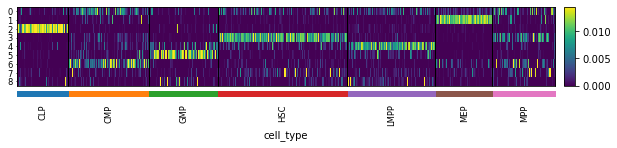

In [10]:
sc.pp.normalize_total(adataH, inplace=True)
sc.pl.heatmap(adataH, ["0","1","2","3","4","5","6","7","8"], groupby='cell_type', swap_axes=True,show = False)

In [11]:
peaks = Projection_matrix.iloc[:,2].sort_values(ascending=False)[0:1000].index
peaks = pd.DataFrame(peaks)["peak"].str.replace(r'_',' ',regex =True)


In [12]:
peaks.head()

0        chr5 4022178 4022678
1      chr2 47951345 47951845
2    chr6 107150240 107150740
3    chr2 232537159 232537659
4      chr3 13315951 13316451
Name: peak, dtype: object

## Run scCASER

Run scCASER use function scCASE.run with parameter:method="scCASER"

In [13]:
data_imputed = scCASE.run("BM0828.h5ad","bulk.h5ad",data_format="h5ad",method="scCASER",obs_key = "cell_type",var_key = "peak",save_other_matrixs_=True)

Data shape after feature selection:
(99662, 533)
Reference shape after feature selection:
(99662, 17)
Raw dataset shape:  (533, 99662)
Dataset shape after preprocessing:  (533, 92229)
Estimating by sum of squared distances...
Estimating by Davies-Bouldin score...
Estimating by silhouette coefficient...
Initializing...
Generating similarity matrix...
Updating...
Iteration: 1	Loss: 0.6335565396139013	norm1: 0.0974778892437705	norm2: 0.017302145673853405	norm3: 0.005783225692809342	norm4: 0.5129932790034681	norm5: 0.0	norm6: 0.0
Iteration: 2	Loss: 0.6140068222439008	norm1: 0.09169977187545525	norm2: 0.0009406585958712427	norm3: 0.003997719773855054	norm4: 0.5173686719987193	norm5: 0.0	norm6: 0.0
Iteration: 3	Loss: 0.6142168767243754	norm1: 0.09218282338342963	norm2: 0.0009126669463429479	norm3: 0.0036135810867403487	norm4: 0.5175078053078624	norm5: 0.0	norm6: 0.0
Iteration: 4	Loss: 0.6130725391463525	norm1: 0.09098020398535994	norm2: 0.0009132714835187277	norm3: 0.0035156081507220034	norm

In [14]:
data_imputed[0]

,HSC,HSC,HSC,HSC,HSC,HSC,HSC,HSC,HSC,HSC,...,MEP,MEP,MEP,MEP,MEP,MEP,MEP,MEP,MEP,MEP
chr1_237535_238035,0.146117,0.258430,0.170401,0.161219,0.158653,0.258108,0.134852,0.147681,0.341897,0.069925,...,0.615761,0.659400,0.600958,0.645302,0.614676,0.672849,0.637230,0.528807,0.649316,0.665474
chr1_540469_540969,0.145277,0.232595,0.178268,0.160901,0.150154,0.222831,0.137767,0.155013,0.325827,0.115203,...,0.341277,0.379162,0.344926,0.373077,0.358627,0.379460,0.356545,0.298765,0.362586,0.387744
chr1_773631_774131,0.004050,0.062820,0.021997,0.018891,0.038035,0.078068,0.003716,0.180604,0.137381,0.180870,...,0.913551,0.865246,0.866964,0.851878,0.885331,0.949533,0.930302,0.825789,0.916967,0.891677
chr1_805097_805597,0.002640,0.036703,0.026484,0.010672,0.003818,0.020371,0.001556,0.007866,0.014590,0.005328,...,0.010403,0.012511,0.020729,0.011666,0.007856,0.009844,0.022457,0.009683,0.009051,0.024651
chr1_826009_826509,0.030948,0.090798,0.052685,0.028736,0.036541,0.059184,0.052658,0.694922,0.034204,0.999605,...,0.039254,0.042211,0.038698,0.040421,0.036934,0.045509,0.040630,0.045637,0.038546,0.043244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9_140778981_140779481,0.162206,0.359452,0.207255,0.183049,0.191218,0.419692,0.149580,0.382138,0.428077,0.390135,...,0.547292,0.573234,0.498047,0.554031,0.514160,0.558993,0.548263,0.564818,0.512374,0.564468
chr9_140916727_140917227,0.076653,0.171636,0.062723,0.065413,0.050042,0.226644,0.038238,0.096816,0.163715,0.082630,...,0.246381,0.359029,0.304434,0.342232,0.312670,0.326736,0.253233,0.167251,0.319971,0.350238
chr9_140917662_140918162,0.082610,0.114748,0.072876,0.072339,0.062835,0.134324,0.043922,0.146254,0.199013,0.140463,...,0.206651,0.239996,0.206418,0.217311,0.200234,0.245359,0.212378,0.173378,0.209765,0.230607
chr9_140948722_140949222,0.024356,0.184072,0.061112,0.044670,0.027129,0.191939,0.012802,0.127846,0.136788,0.128098,...,0.586948,0.696451,0.677277,0.683324,0.653328,0.674570,0.620105,0.452303,0.686826,0.695412


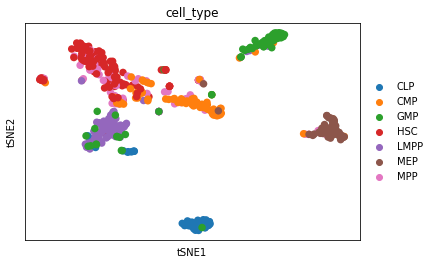

In [15]:
adata_imputed = ad.AnnData(data_imputed[0].T)
adata_imputed.obs = pd.DataFrame(data_imputed[0].columns,columns = ["cell_type"])
adata_imputed.var = pd.DataFrame(data_imputed[0].index,columns = ["peak"])
sc.pp.pca(adata_imputed)
sc.tl.tsne(adata_imputed)
sc.pl.tsne(adata_imputed,color = ["cell_type"])